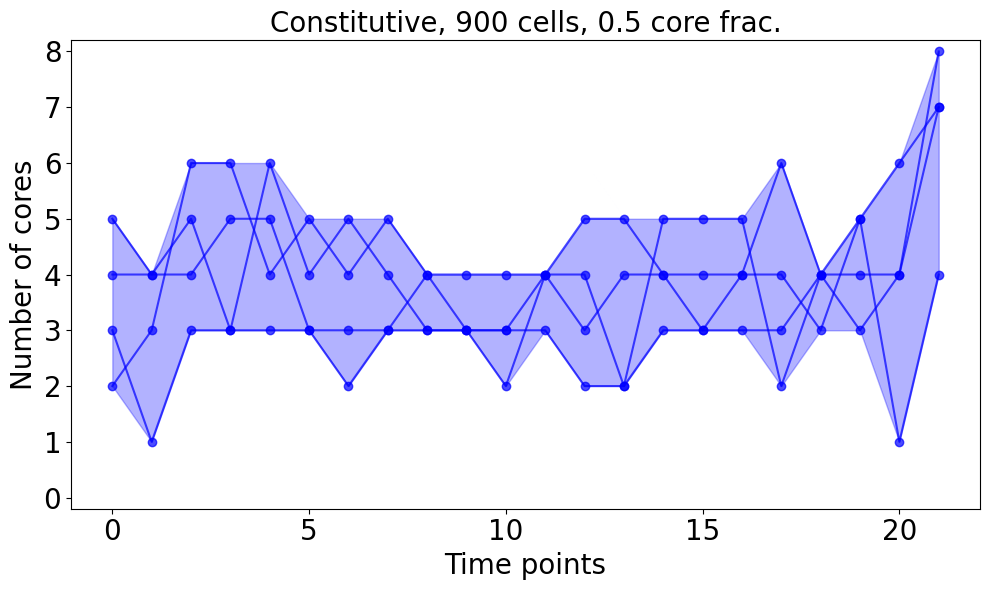

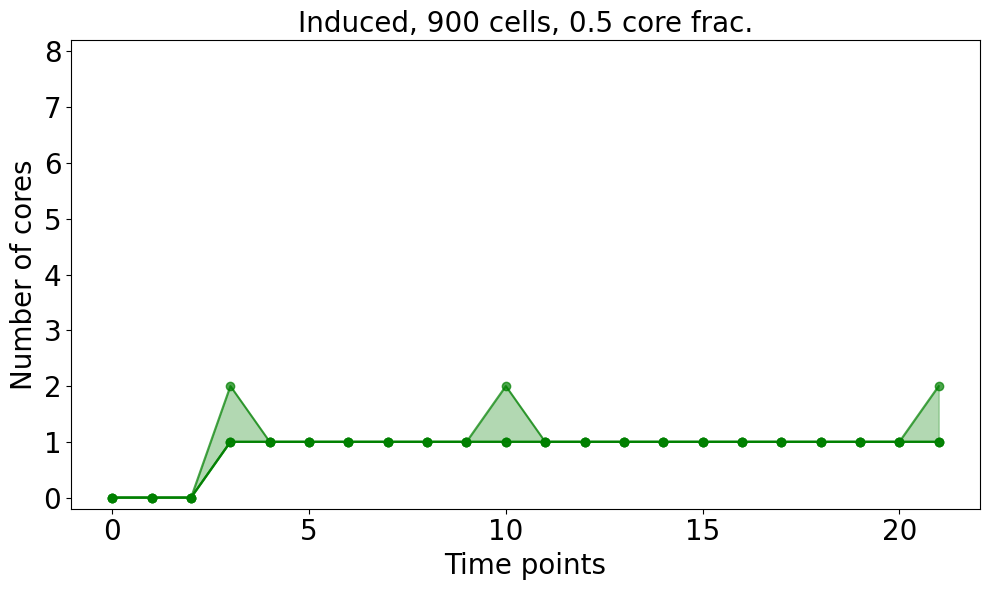

In [4]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataframe
def load_dataframe(filename='../data/data_clustered'):
    with open(f'{filename}.pkl', 'rb') as f:
        loaded = pickle.load(f)
    return loaded['df']


def plot_time_dependent_cores(df, experiment, color, font_size=20):
    # Select relevant slice based on the given conditions
    filtered_df = df[
        (df['n_cells'] == 900) &
        (df['ratio'] == '1:1') &
        (df['cell_type'] == 'B') &
        (df['experiment'] == experiment) &
        (df['cluster_volume'] >= cluster_v_thresh)
        # (df['relative_cluster_volume'] >= 0.1)
    ]

    # Prepare to collect min and max values for fill_between
    all_cores_over_time = []

    # Get unique time points from the dataframe
    unique_time_points = df['t'].unique()

    # Iterate over each unique 'rep' and plot the time-dependent number of cores
    plt.figure(figsize=(10, 6))
    for rep in filtered_df['rep'].unique():
        rep_df = filtered_df[filtered_df['rep'] == rep]
        cores_over_time = rep_df.groupby('t')['cluster'].nunique()
        cores_over_time = cores_over_time.reindex(unique_time_points, fill_value=0)  # Align with unique time points, fill missing with 0
        all_cores_over_time.append(cores_over_time)
        
        plt.plot(cores_over_time.index, cores_over_time.values, marker='o', linestyle='-', color=color, alpha=0.7)

    # Concatenate results into a DataFrame and reindex to ensure alignment
    all_cores_df = pd.concat(all_cores_over_time, axis=1).fillna(0)  # Fill missing time points with 0
    all_cores_df = all_cores_df.sort_index()  # Ensure indices are sorted

    # Compute the min and max values at each time point
    min_values = all_cores_df.min(axis=1)
    max_values = all_cores_df.max(axis=1)

    # Fill between min and max values
    plt.fill_between(min_values.index, min_values, max_values, color=color, alpha=0.3)

    # Plot configuration
    plt.xlabel('Time points', fontsize=font_size)
    plt.ylabel('Number of cores', fontsize=font_size)
    plt.title(f'{experiment.capitalize()}, 900 cells, 0.5 core frac.', fontsize=font_size)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.ylim(-0.2, 8.2)
    plt.tight_layout()
    plt.show()

# Load dataframe
df = load_dataframe()
median_B_cell_volume = np.median(df[(df.t==0) & (df.cell_type=='B')].v)
cluster_v_thresh = 3 * median_B_cell_volume

# Run the function twice with different parameters
plot_time_dependent_cores(df, experiment='constitutive', color='blue')
plot_time_dependent_cores(df, experiment='induced', color='green')


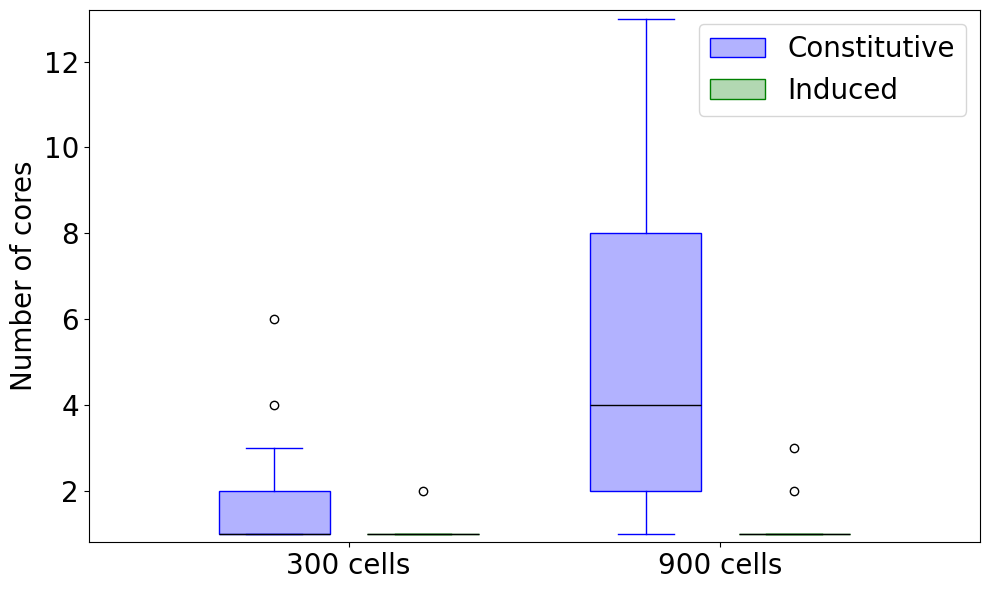

In [5]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def plot_final_timepoint_cores(df, font_size=20):
    # Select relevant slices at final time point (t=21) and relative cluster volume >= 0.1
    filtered_df = df[
        (df['t'] == 21) &
        (df['cluster_volume'] >= cluster_v_thresh)
        # (df['relative_cluster_volume'] >= 0.1)
    ]

    # Calculate number of unique clusters (cores) per unique combination of (n_cells, ratio, experiment, rep)
    core_counts = filtered_df.groupby(['n_cells', 'ratio', 'experiment', 'rep'])['cluster'].nunique().reset_index()

    # Split data based on conditions for plotting
    cores_300_constitutive = core_counts[(core_counts['n_cells'] == 300) & (core_counts['experiment'] == 'constitutive')]['cluster']
    cores_300_induced = core_counts[(core_counts['n_cells'] == 300) & (core_counts['experiment'] == 'induced')]['cluster']
    cores_900_constitutive = core_counts[(core_counts['n_cells'] == 900) & (core_counts['experiment'] == 'constitutive')]['cluster']
    cores_900_induced = core_counts[(core_counts['n_cells'] == 900) & (core_counts['experiment'] == 'induced')]['cluster']

    # Set up plot
    plt.figure(figsize=(10, 6))
    bar_width = 0.4
    x_ticks = np.array([1, 2])

    # Plotting the boxplots for 300 and 900 cells
    plt.boxplot([cores_300_constitutive, cores_900_constitutive],
                positions=[x_ticks[0] - bar_width / 2, 
                          x_ticks[1] - bar_width / 2],
                patch_artist=True,
                widths=0.3,
                # boxprops=dict(facecolor=('blue'), color='blue'),
                boxprops = dict(facecolor='#b2b2ff', color='blue'),
                medianprops=dict(color='black'),
                whiskerprops=dict(color='blue'),
                capprops=dict(color='blue'),
                label='Constitutive')

    plt.boxplot([cores_300_induced, cores_900_induced],
                positions=[x_ticks[0] + bar_width / 2, 
                          x_ticks[1] + bar_width / 2],
                patch_artist=True,
                widths=0.3,
                boxprops=dict(facecolor="#b2d8b2", color='green'),
                medianprops=dict(color='black'),
                whiskerprops=dict(color='green'),
                capprops=dict(color='green'),
                label='Induced')

    # Plot configuration
    plt.xticks(x_ticks, ['300 cells', '900 cells'], fontsize=font_size)
    plt.ylabel('Number of cores', fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.ylim(0.8,13.2)
    plt.tight_layout()
    plt.legend(fontsize=font_size)
    plt.show()
    
    
    return core_counts

# Load dataframe
df = load_dataframe()
median_B_cell_volume = np.median(df[(df.t==0) & (df.cell_type=='B')].v)
cluster_v_thresh = 3 * median_B_cell_volume

# Plot final time point cores for 300 and 900 cell cases
o = plot_final_timepoint_cores(df)


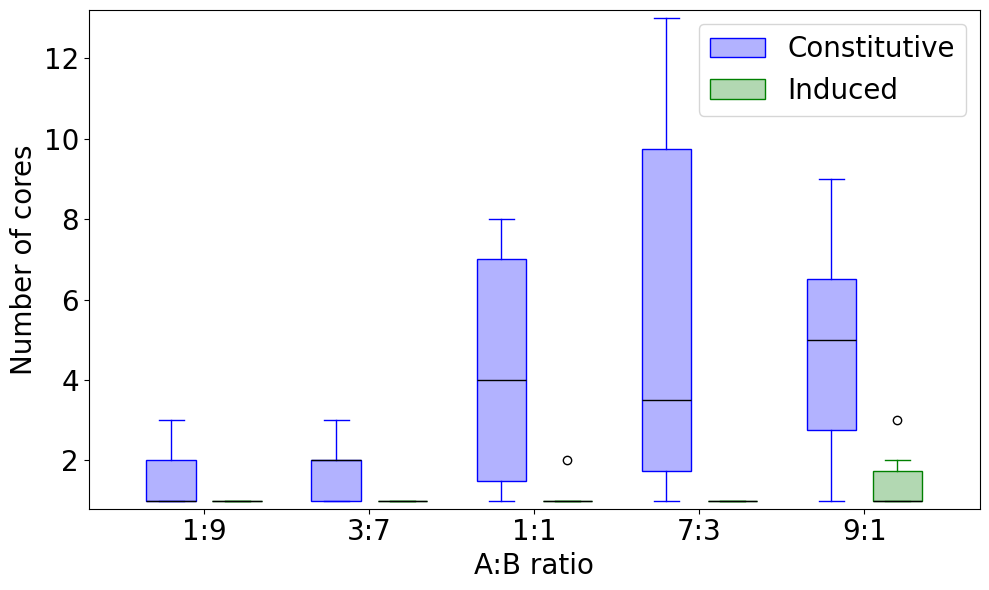

In [ ]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



def plot_final_timepoint_cores_by_ratio(df, font_size=20):
    filtered_df = df[
        (df['t'] == 21) &
        (df['cluster_volume'] >= cluster_v_thresh)
    ]

    # Calculate number of unique clusters (cores) per unique combination of (n_cells, ratio, experiment, rep)
    core_counts = filtered_df.groupby(['n_cells', 'ratio', 'experiment', 'rep'])['cluster'].nunique().reset_index()

    # Define the ratio values for plotting
    ratios = ['1:9', '3:7', '1:1', '7:3', '9:1']

    # Split data based on ratio and experiment for plotting
    cores_constitutive = [core_counts[(core_counts['ratio'] == ratio) & (core_counts['experiment'] == 'constitutive')]['cluster'] for ratio in ratios]
    cores_induced = [core_counts[(core_counts['ratio'] == ratio) & (core_counts['experiment'] == 'induced')]['cluster'] for ratio in ratios]

    # Set up plot
    plt.figure(figsize=(10, 6))
    bar_width = 0.4
    x_ticks = np.arange(len(ratios)) + 1

    # Plotting the boxplots for each ratio
    for i, ratio in enumerate(ratios):
        plt.boxplot(cores_constitutive[i],
                    positions=[x_ticks[i] - bar_width / 2],
                    patch_artist=True,
                    widths=0.3,
                    boxprops=dict(facecolor='#b2b2ff', color='blue'),
                    medianprops=dict(color='black'),
                    whiskerprops=dict(color='blue'),
                    capprops=dict(color='blue'),
                    label='Constitutive' if i==0 else None)

        plt.boxplot(cores_induced[i],
                    positions=[x_ticks[i] + bar_width / 2],
                    patch_artist=True,
                    widths=0.3,
                    boxprops=dict(facecolor="#b2d8b2", color='green'),
                    medianprops=dict(color='black'),
                    whiskerprops=dict(color='green'),
                    capprops=dict(color='green'),
                    label='Induced' if i==0 else None)

    # Plot configuration
    plt.xticks(x_ticks, ratios, fontsize=font_size)
    plt.ylabel('Number of cores', fontsize=font_size)
    plt.xlabel('A:B ratio', fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.ylim(0.8, 13.2)
    plt.tight_layout()
    plt.legend(fontsize=font_size)
    plt.show()

# Load dataframe
df = load_dataframe()
median_B_cell_volume = np.median(df[(df.t==0) & (df.cell_type=='B')].v)
cluster_v_thresh = 3 * median_B_cell_volume

# Plot final time point cores for different ratios
plot_final_timepoint_cores_by_ratio(df)
